In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the merged df ridership wx data 
df = pd.read_csv(r'D:\capstone_F24\data\Cleaned_data\ridership_weather.csv')


In [3]:
# View the first 5 rows of the dataframe
display(df.head())

,timestamp,station_complex_id,ridership,hour,day_of_week,month,is_weekend,holiday,holiday_name,ridership_lag_1,...,rolling_mean_6h,rolling_std_6h,date,NAME,TMAX,TMIN,TAVG,PRCP,AWND,SNOW
0,2022-02-01 00:00:00,1,17.0,0,1,2,0,0,No Holiday,17.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
1,2022-02-01 01:00:00,1,5.0,1,1,2,0,0,No Holiday,17.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
2,2022-02-01 02:00:00,1,6.0,2,1,2,0,0,No Holiday,5.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
3,2022-02-01 03:00:00,1,12.0,3,1,2,0,0,No Holiday,6.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
4,2022-02-01 04:00:00,1,44.0,4,1,2,0,0,No Holiday,12.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787552 entries, 0 to 5787551
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           object 
 1   station_complex_id  int64  
 2   ridership           float64
 3   hour                int64  
 4   day_of_week         int64  
 5   month               int64  
 6   is_weekend          int64  
 7   holiday             int64  
 8   holiday_name        object 
 9   ridership_lag_1     float64
 10  ridership_lag_3     float64
 11  ridership_lag_7     float64
 12  ridership_lag_24    float64
 13  rolling_mean_6h     float64
 14  rolling_std_6h      float64
 15  date                object 
 16  NAME                object 
 17  TMAX                float64
 18  TMIN                float64
 19  TAVG                float64
 20  PRCP                float64
 21  AWND                float64
 22  SNOW                float64
dtypes: float64(13), int64(6), object(4)
memory usage: 1015.6+

In [5]:
# convert timesstamp and data to datetime
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
# View after conversion to check date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787552 entries, 0 to 5787551
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   station_complex_id  int64         
 2   ridership           float64       
 3   hour                int64         
 4   day_of_week         int64         
 5   month               int64         
 6   is_weekend          int64         
 7   holiday             int64         
 8   holiday_name        object        
 9   ridership_lag_1     float64       
 10  ridership_lag_3     float64       
 11  ridership_lag_7     float64       
 12  ridership_lag_24    float64       
 13  rolling_mean_6h     float64       
 14  rolling_std_6h      float64       
 15  date                datetime64[ns]
 16  NAME                object        
 17  TMAX                float64       
 18  TMIN                float64       
 19  TAVG                float64       
 20  PR

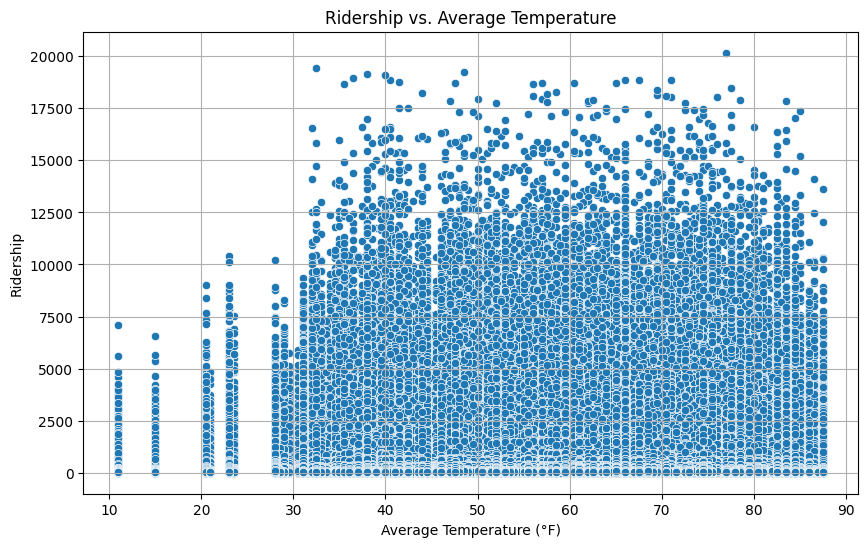

In [7]:
# Scatter plot of ridership vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TAVG'], y=df['ridership'])
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Ridership')
plt.title('Ridership vs. Average Temperature')
plt.grid(True)
plt.show()


           ridership      TMAX      TMIN      TAVG      PRCP      AWND  \
ridership   1.000000 -0.000465  0.000655  0.000078 -0.009157 -0.003591   
TMAX       -0.000465  1.000000  0.946519  0.987401 -0.026624 -0.526847   
TMIN        0.000655  0.946519  1.000000  0.985649  0.034517 -0.525733   
TAVG        0.000078  0.987401  0.985649  1.000000  0.002999 -0.533482   
PRCP       -0.009157 -0.026624  0.034517  0.002999  1.000000  0.151089   
AWND       -0.003591 -0.526847 -0.525733 -0.533482  0.151089  1.000000   
SNOW       -0.005701 -0.130574 -0.129372 -0.131764  0.032732  0.051845   

               SNOW  
ridership -0.005701  
TMAX      -0.130574  
TMIN      -0.129372  
TAVG      -0.131764  
PRCP       0.032732  
AWND       0.051845  
SNOW       1.000000  


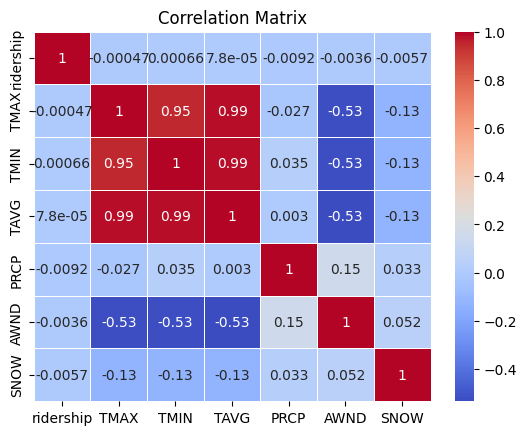

In [8]:
# Correlation matrix
corr_matrix = df[['ridership', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'AWND', 'SNOW']].corr()
print(corr_matrix)

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Initialize a scaler
scaler = MinMaxScaler()

# List of columns to scale
columns_to_scale = ['TMAX', 'TMIN', 'TAVG', 'PRCP', 'AWND', 'SNOW']

# Fit and transform the weather features
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [10]:
df['weekend_temp'] = df['is_weekend'] * df['TAVG']
df['hourly_precipitation'] = df['hour'] * df['PRCP']


In [11]:
# Update feature columns to include weather variables
feature_cols = [
    'hour', 'day_of_week', 'month', 'is_weekend', 'holiday', 'ridership_lag_1',
    'ridership_lag_3', 'ridership_lag_7', 'ridership_lag_24', 'rolling_mean_6h',
    'rolling_std_6h', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'AWND', 'SNOW'
]

# Define target variable
target_col = 'ridership'


In [12]:
# Train-test split using time (e.g., 2022 for training, 2023 for testing)
train = df[df['timestamp'].dt.year == 2022]
test = df[df['timestamp'].dt.year == 2023]

# Prepare training and testing data
X_train = train[feature_cols]
y_train = train[target_col]
X_test = test[feature_cols]
y_test = test[target_col]


In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train the XGBoost model
xgb_model = XGBRegressor(random_state=42, n_jobs=24)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)


Mean Squared Error (XGBoost): 14650.528712492347


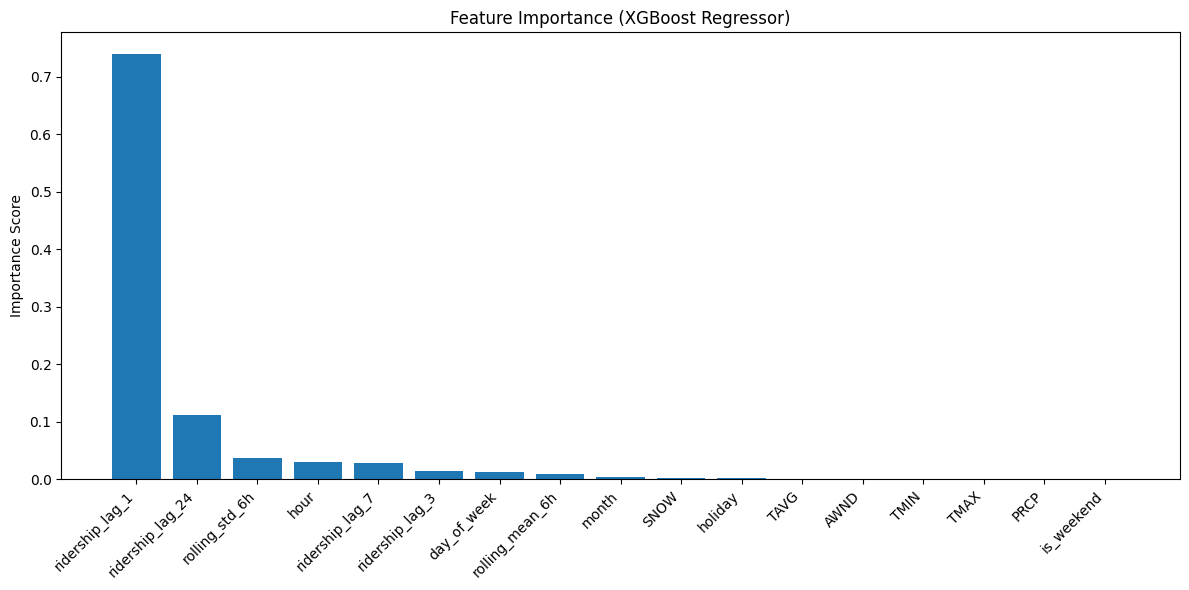

In [14]:
importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_features = [feature_cols[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (XGBoost Regressor)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=45, ha='right')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

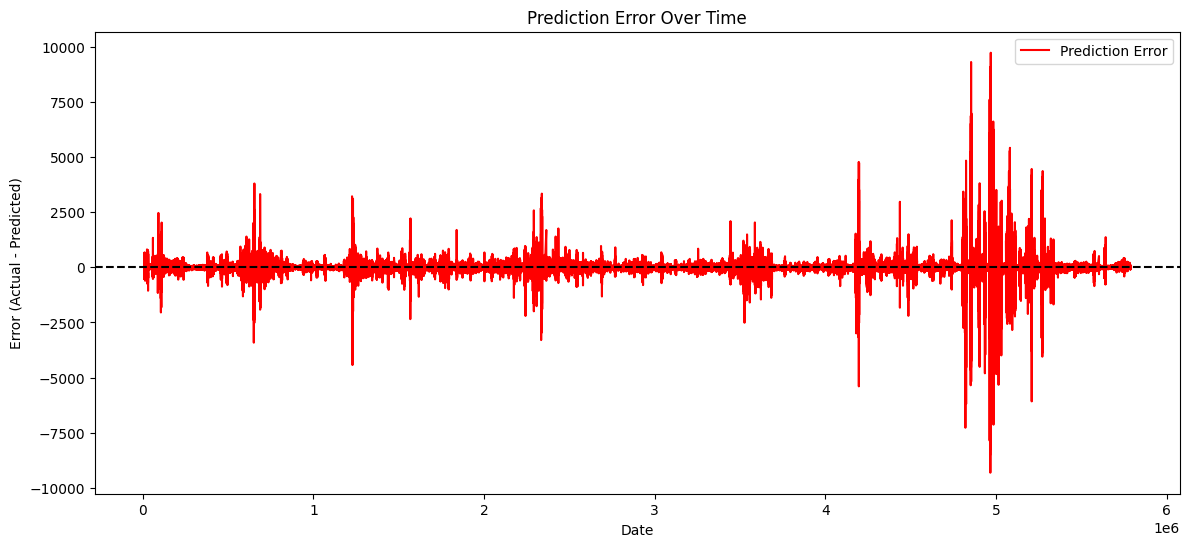

In [15]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_xgb
}, index=y_test.index)

results_df['error'] = results_df['actual'] - results_df['predicted']

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(results_df.index, results_df['error'], label='Prediction Error', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Prediction Error Over Time')
plt.legend()
plt.show()


KeyError: "None of [Index(['timestamp', 'station_complex_id'], dtype='object')] are in the [columns]"